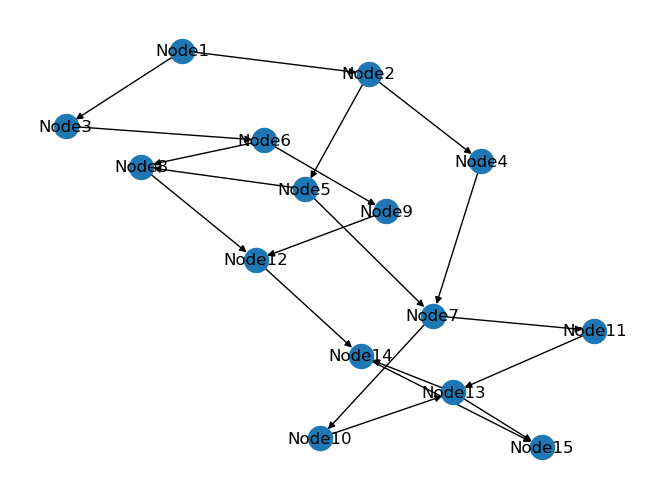

In [1]:
from pylab import *
import networkx as nx

#G = nx.read_adjlist('graph.csv', delimiter=',')

D = nx.DiGraph()
with open('graph.csv','r') as f:
    for line in f:
        line=line.split(',')#split the line up into a list - the first entry will be the node, the others his friends
        if len(line)==1:#in case the node has no friends, we should still add him to the network
            if line[0].strip() not in D:
                nx.add_node(line[0].strip())
        else:#in case the node has friends, loop over all the entries in the list
            focal_node = line[0]#pick your node
            for friend in line[1:]:#loop over the friends
                D.add_edge(focal_node.strip(),friend.strip())#add each edge to the graph

nx.draw(D, with_labels=True )
#print(D.nodes(),G.edges())
#print(G.nodes(),G.edges())

Node1 weight 0.020960780788414398
Node2 weight 0.029868875563446605
Node3 weight 0.029868875563446605
Node4 weight 0.033654750407396794
Node5 weight 0.033654750407396794
Node6 weight 0.04634872002637919
Node7 weight 0.0638699507909819
Node8 weight 0.05496185601594972
Node9 weight 0.04065879934842721
Node10 weight 0.04810564156570771
Node11 weight 0.04810564156570771
Node12 weight 0.10223888052027946
Node13 weight 0.10274145672491056
Node14 weight 0.15153157876449194
Node15 weight 0.19342944194706346


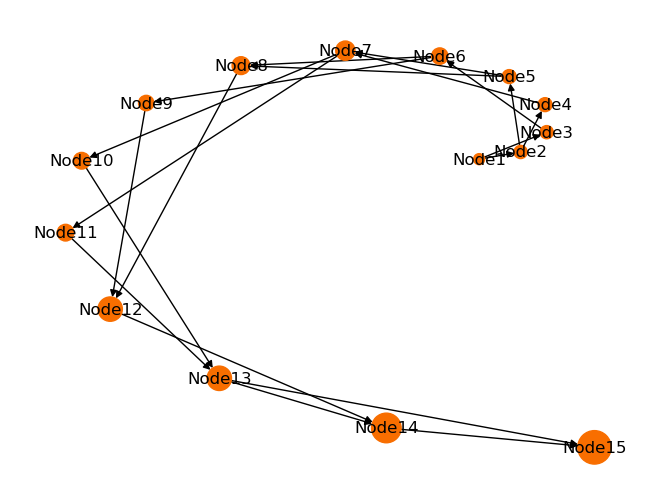

In [2]:
pr1 = nx.pagerank(D)

for x in pr1:
    print(x + " weight " + str(pr1[x]))
pos = nx.spiral_layout(D)
nx.draw(D, pos, nodelist=list(pr1.keys()), node_size=[round(v*3000) for v in pr1.values()] ,with_labels = True, node_color="#f86e00")
plt.show()

In [4]:
import pandas as pd
from surprise import Dataset
from surprise import Reader

df = pd.read_csv('ratings_small_training.csv')

print(df)

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)

testDf = pd.read_csv('ratings_small_test.csv')
testDf = testDf.reset_index()

print(testDf)

       userId  movieId  rating
0           1       31     2.5
1           1     1029     3.0
2           1     1061     3.0
3           1     1129     2.0
4           1     1172     4.0
...       ...      ...     ...
99992     671     6268     2.5
99993     671     6269     4.0
99994     671     6365     4.0
99995     671     6385     2.5
99996     671     6565     3.5

[99997 rows x 3 columns]
   index  userid  movieid
0      0       1     1339
1      1       2      377
2      2       3      527
3      3       4      112
4      4       5      150
5      5       6     2072
6      6       7      333
7      7       8      805
8      8       9      608
9      9      10     1127


In [5]:
from surprise import KNNWithMeans
sim_options = {
    "name": "cosine"
}
algo = KNNWithMeans(sim_options=sim_options)

In [6]:
trainingSet = data.build_full_trainset()

algo.fit(trainingSet)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [7]:

predictions = []
for index, row in testDf.iterrows():
    prediction = algo.predict(row['userid'], row['movieid'])
    predictions.append(prediction.est)
    print(row['userid'], row['movieid'], round(prediction.est, 2))

testDf.insert(3, "rating", predictions, True)

1 1339 2.42
2 377 3.31
3 527 4.1
4 112 4.16
5 150 4.12
6 2072 2.76
7 333 3.35
8 805 4.08
9 608 4.29
10 1127 3.74


In [9]:
testDf.to_csv('ratings_small_test_Updated.csv', index = False) 
